In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

PROJECT_DIR = '.'
DATA_DIR = r'F:\Git\data\userprofile'
TRAIN_FILE = 'train_dataset.csv'
TEST_FILE = 'test_dataset.csv'
OUTPUT_PATH = os.path.join(DATA_DIR, "result")

TRAIN_DATA = os.path.join(DATA_DIR, TRAIN_FILE)
TEST_DATA = os.path.join(DATA_DIR, TEST_FILE)


In [2]:
def load_data(file, is_train):
    columns = ['id','is_real_name','age','is_undegraduate'
    ,'is_blacklist','is_4G_ill','net_age_m'
    ,'last_pay_m','last_pay_amt','last_6m_avg_consume','m_cost','m_balance','is_arrears','charge_sensitivity','m_social_persons'
    ,'is_offen_mall','last_3m_mavg_mall','is_m_WanDa','is_m_Sam','is_m_movies','is_m_tour','is_m_pay_gym'
    ,'m_online_shop_app_num','m_express_app_num','m_finance_app_num','m_video_app_num'
               ,'m_airplane_app_num','m_train_app_num','m_tour_news_app_num'
    ]
    if is_train:
        columns.append('score')
    data = pd.read_csv(file, header=0, names=columns)
    return data


In [3]:
train_data = load_data(TRAIN_DATA, is_train=1)
train_data.head()

,id,is_real_name,age,is_undegraduate,is_blacklist,is_4G_ill,net_age_m,last_pay_m,last_pay_amt,last_6m_avg_consume,...,is_m_tour,is_m_pay_gym,m_online_shop_app_num,m_express_app_num,m_finance_app_num,m_video_app_num,m_airplane_app_num,m_train_app_num,m_tour_news_app_num,score
0,a4651f98c82948b186bdcdc8108381b4,1,44,0,0,0,186,1,99.80,163.86,...,1,1,713,0,2740,7145,0,0,30,664
1,aeb10247db4e4d67b2550bbc42ff9827,1,18,0,0,1,5,1,29.94,153.28,...,0,0,414,0,2731,44862,0,0,0,530
2,5af23a1e0e77410abb25e9a7eee510aa,1,47,0,0,0,145,1,49.90,109.64,...,0,0,3391,0,0,4804,0,0,1,643
3,43c64379d3c24a15b8478851b22049e4,1,55,0,0,0,234,1,99.80,92.97,...,1,1,500,0,1931,3141,0,0,5,649
4,f1687f3b8a6f4910bd0b13eb634056e2,1,40,0,0,0,76,1,49.90,95.47,...,1,0,522,0,64,59,0,0,0,648


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
id                       50000 non-null object
is_real_name             50000 non-null int64
age                      50000 non-null int64
is_undegraduate          50000 non-null int64
is_blacklist             50000 non-null int64
is_4G_ill                50000 non-null int64
net_age_m                50000 non-null int64
last_pay_m               50000 non-null int64
last_pay_amt             50000 non-null float64
last_6m_avg_consume      50000 non-null float64
m_cost                   50000 non-null float64
m_balance                50000 non-null int64
is_arrears               50000 non-null int64
charge_sensitivity       50000 non-null int64
m_social_persons         50000 non-null int64
is_offen_mall            50000 non-null int64
last_3m_mavg_mall        50000 non-null int64
is_m_WanDa               50000 non-null int64
is_m_Sam                 50000 non-null int64
is_m_movie

In [13]:
train_data.describe()

,is_real_name,age,is_undegraduate,is_blacklist,is_4G_ill,net_age_m,last_pay_m,last_pay_amt,last_6m_avg_consume,m_cost,...,is_m_tour,is_m_pay_gym,m_online_shop_app_num,m_express_app_num,m_finance_app_num,m_video_app_num,m_airplane_app_num,m_train_app_num,m_tour_news_app_num,score
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.00000,50000.00000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.99022,37.883440,0.003720,0.048800,0.088580,96.448680,0.700100,53.415929,98.732081,99.575130,...,0.47442,0.37412,1148.815260,1.197840,971.50308,3.366519e+03,0.704420,0.553340,19.117120,618.053060
std,0.09841,11.613239,0.060879,0.215452,0.284139,59.176593,0.458218,61.812022,60.757758,65.327335,...,0.49935,0.48390,3992.957952,44.469584,3006.16776,1.151006e+04,28.721302,7.735913,170.074772,42.443022
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,422.000000
25%,1.00000,30.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.180000,52.675000,...,0.00000,0.00000,18.000000,0.000000,6.00000,1.000000e+01,0.000000,0.000000,0.000000,594.000000
50%,1.00000,36.000000,0.000000,0.000000,0.000000,94.000000,1.000000,49.900000,89.320000,89.620000,...,0.00000,0.00000,250.000000,0.000000,267.00000,3.350000e+02,0.000000,0.000000,0.000000,627.000000
75%,1.00000,45.000000,0.000000,0.000000,0.000000,139.000000,1.000000,99.800000,131.160000,133.945000,...,1.00000,1.00000,932.000000,0.000000,1147.25000,2.423250e+03,0.000000,0.000000,4.000000,649.000000
max,1.00000,111.000000,1.000000,1.000000,1.000000,288.000000,1.000000,998.000000,840.570000,1164.290000,...,1.00000,1.00000,234336.000000,8235.000000,496238.00000,1.382227e+06,5856.000000,474.000000,13965.000000,719.000000


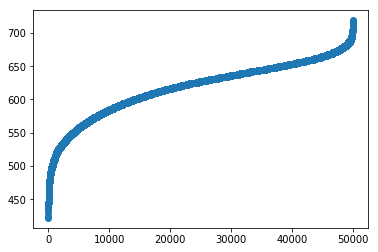

In [57]:
plt.scatter(range(train_data.shape[0]), np.sort(train_data["score"].values))

# train_data["score"].plot(kind="scatter")

In [15]:
from scipy.stats import spearmanr
y = train_data["score"]
# y_mean = y.mean()
# y = y - y_mean
scores = []
for c in train_data.columns:
    score = spearmanr(y, train_data[c])
    scores.append(score[0])
sorted(zip(scores, train_data.columns),reverse=True)
    

E:\ProgramPrivate\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


[(0.9999999999999999, 'score'),
 (0.7156279425021737, 'm_social_persons'),
 (0.5659366008114223, 'net_age_m'),
 (0.5496439291428278, 'last_6m_avg_consume'),
 (0.5105240502061527, 'm_cost'),
 (0.34049061774572087, 'last_pay_amt'),
 (0.34026654389919136, 'm_finance_app_num'),
 (0.2739790872362088, 'is_m_tour'),
 (0.27296845111792967, 'm_video_app_num'),
 (0.26011021645228166, 'm_online_shop_app_num'),
 (0.24867241254329234, 'last_3m_mavg_mall'),
 (0.24232038212385115, 'is_m_pay_gym'),
 (0.22769067169117244, 'm_balance'),
 (0.20558988229740796, 'last_pay_m'),
 (0.170841528818388, 'is_m_movies'),
 (0.133697766240571, 'm_tour_news_app_num'),
 (0.11956995798684057, 'is_blacklist'),
 (0.11385350497839136, 'is_offen_mall'),
 (0.10707746900374818, 'is_arrears'),
 (0.0990350764953987, 'age'),
 (0.09523096796006848, 'm_train_app_num'),
 (0.06419351370319572, 'm_airplane_app_num'),
 (0.056039327693751015, 'is_m_Sam'),
 (0.05429289394608231, 'is_m_WanDa'),
 (0.03828622250841915, 'is_real_name'),
 (

In [49]:
tmp_train = train_data.copy()
tmp_train["sum_2_to_3"] = tmp_train["is_m_tour"] + tmp_train["is_m_pay_gym"]
tmp_train["sum_1_to_2"] = tmp_train["is_m_movies"] + tmp_train["is_blacklist"] + tmp_train["is_offen_mall"] + tmp_train["is_arrears"]
tmp_train["sum_0_to_1"] = tmp_train["is_m_Sam"] + tmp_train["is_m_WanDa"] + tmp_train["is_real_name"] + tmp_train["is_undegraduate"]
tmp_train["sum_m_to_m"] = tmp_train["is_m_Sam"] + tmp_train["is_m_WanDa"] + tmp_train["is_m_tour"] + tmp_train["is_m_pay_gym"] + tmp_train["is_m_movies"]
tmp_train["sum_p_to_p"] = tmp_train["is_blacklist"] + tmp_train["is_real_name"] + tmp_train["is_undegraduate"] - tmp_train["is_4G_ill"]\
     - tmp_train["charge_sensitivity"]
tmp_train["sum_p_certain"] = tmp_train["is_blacklist"] + tmp_train["is_real_name"] + tmp_train["is_undegraduate"] + tmp_train["is_arrears"]
tmp_train["sum_customer"] = tmp_train["is_m_tour"] + tmp_train["is_m_pay_gym"] + tmp_train["is_m_movies"] + tmp_train["is_offen_mall"]\
     + tmp_train["is_m_Sam"] + tmp_train["is_m_WanDa"]
y = tmp_train["score"]
scores = []
for c in tmp_train.columns:
    score = spearmanr(y, tmp_train[c])
    scores.append(score[0])
sorted(zip(scores, tmp_train.columns),reverse=True)

E:\ProgramPrivate\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


[(0.9999999999999999, 'score'),
 (0.7156279425021737, 'm_social_persons'),
 (0.5659366008114223, 'net_age_m'),
 (0.5496439291428278, 'last_6m_avg_consume'),
 (0.5105240502061527, 'm_cost'),
 (0.34049061774572087, 'last_pay_amt'),
 (0.34026654389919136, 'm_finance_app_num'),
 (0.3201322528957095, 'sum_m_to_m'),
 (0.31790114371519723, 'sum_2_to_3'),
 (0.30780317921098704, 'sum_customer'),
 (0.2739790872362088, 'is_m_tour'),
 (0.27296845111792967, 'm_video_app_num'),
 (0.2713289329219715, 'sum_p_to_p'),
 (0.26011021645228166, 'm_online_shop_app_num'),
 (0.24867241254329234, 'last_3m_mavg_mall'),
 (0.24232038212385115, 'is_m_pay_gym'),
 (0.22769067169117244, 'm_balance'),
 (0.2195384650663556, 'sum_1_to_2'),
 (0.20558988229740796, 'last_pay_m'),
 (0.170841528818388, 'is_m_movies'),
 (0.15690123364868042, 'sum_p_certain'),
 (0.133697766240571, 'm_tour_news_app_num'),
 (0.11956995798684057, 'is_blacklist'),
 (0.11385350497839136, 'is_offen_mall'),
 (0.10707746900374818, 'is_arrears'),
 (0.09

In [30]:
tmp_train["net_age_per_age"] = (tmp_train["net_age_m"]+1)/(tmp_train["age"]*12+50000)
spearmanr(tmp_train["net_age_per_age"], tmp_train["score"])[0]

0.5665093938842714

In [33]:
tmp_train["last_pay_amt_per_m"] = (tmp_train["last_pay_amt"]+1)/(tmp_train["last_pay_m"]+50000)
spearmanr(tmp_train["last_pay_amt_per_m"], tmp_train["score"])[0]

0.3391998518272018

In [34]:
tmp_train["last_pay_amt_per_m"] = (tmp_train["last_pay_amt"]+1)/(tmp_train["last_6m_avg_consume"]+50000)
spearmanr(tmp_train["last_pay_amt_per_m"], tmp_train["score"])[0]

0.2458246059371649

In [35]:
tmp_train["last_pay_amt_per_m"] = (tmp_train["last_pay_m"])*(tmp_train["last_6m_avg_consume"])
spearmanr(tmp_train["last_pay_amt_per_m"], tmp_train["score"])[0]

0.4164721383245637

In [44]:
tmp_train["last_pay_amt_per_m"] = (tmp_train["m_cost"]) * (tmp_train["charge_sensitivity"])
spearmanr(tmp_train["last_pay_amt_per_m"], tmp_train["score"])[0]

0.3690308978517378

In [45]:
tmp_train["last_pay_amt_per_m"] = (tmp_train["m_cost"]) * (tmp_train["m_social_persons"])
spearmanr(tmp_train["last_pay_amt_per_m"], tmp_train["score"])[0]

0.7298124999693959

In [15]:
from scipy.stats import pearsonr
y = tmp_train["score"]
tmp_train["net_age_per_age"] = (tmp_train["net_age_m"]+1)/(tmp_train["age"]*12+50000)
print(pearsonr(tmp_train["net_age_per_age"], y))
print("origin pearsonr: ", pearsonr(tmp_train["net_age_m"], y))
print("origin pearsonr: ", pearsonr(tmp_train["age"], y))
print("=================")
print("origin pearsonr: ", pearsonr(tmp_train["net_age_m"],tmp_train["net_age_per_age"]))
print("origin pearsonr: ", pearsonr(tmp_train["age"],tmp_train["net_age_per_age"]))

(0.5477378602694198, 0.0)
origin pearsonr:  (0.5468931449509599, 0.0)
origin pearsonr:  (0.03778044499284771, 2.8938794984083495e-17)
origin pearsonr:  (0.9999878554095478, 0.0)
origin pearsonr:  (0.3134817005931374, 0.0)


In [4]:
from scipy.stats import pearsonr
tmp_train = train_data.copy()
y = tmp_train["score"]
print("origin pearsonr: ", pearsonr(tmp_train["net_age_m"], y))
print("origin pearsonr: ", pearsonr(tmp_train["last_6m_avg_consume"], y))
print("origin pearsonr: ", pearsonr(tmp_train["last_6m_avg_consume"], tmp_train["net_age_m"]))


origin pearsonr:  (0.5468931449509599, 0.0)
origin pearsonr:  (0.49374934653189606, 0.0)
origin pearsonr:  (0.07067446306494087, 2.170455375381627e-56)


In [5]:
tmp_train["net_age_per_age"] = (tmp_train["last_pay_amt"]+tmp_train["m_balance"])-((tmp_train["last_6m_avg_consume"]/6.0)*tmp_train["last_pay_m"])
print("origin pearsonr: ", pearsonr(tmp_train["last_pay_amt"], y))
print("origin pearsonr: ", pearsonr(tmp_train["m_balance"], y))
print("origin pearsonr: ", pearsonr(tmp_train["last_6m_avg_consume"], y))
print("origin pearsonr: ", pearsonr(tmp_train["last_pay_m"], y))
print("origin pearsonr: ", pearsonr(tmp_train["net_age_per_age"], y))
print("------------------------")
print("origin pearsonr: ", pearsonr(tmp_train["last_pay_amt"], tmp_train["net_age_per_age"]))
print("origin pearsonr: ", pearsonr(tmp_train["m_balance"], tmp_train["net_age_per_age"]))
print("origin pearsonr: ", pearsonr(tmp_train["last_6m_avg_consume"], tmp_train["net_age_per_age"]))
print("origin pearsonr: ", pearsonr(tmp_train["last_pay_m"], tmp_train["net_age_per_age"]))

origin pearsonr:  (0.33353855826794865, 0.0)
origin pearsonr:  (0.08109577935298591, 1.0126988341982146e-73)
origin pearsonr:  (0.49374934653189606, 0.0)
origin pearsonr:  (0.21525185793583873, 0.0)
origin pearsonr:  (0.12891380535915978, 3.139067088332336e-184)
------------------------
origin pearsonr:  (0.253275274008578, 0.0)
origin pearsonr:  (0.9848319537795183, 0.0)
origin pearsonr:  (0.19810398629562492, 0.0)
origin pearsonr:  (0.03490118227402184, 5.887983743872522e-15)


In [7]:
tmp_train["net_age_per_age"] = (tmp_train["m_balance"]*tmp_train["charge_sensitivity"])
print("origin pearsonr: ", pearsonr(tmp_train["m_balance"], y))
print("origin pearsonr: ", pearsonr(tmp_train["charge_sensitivity"], y))
print("origin pearsonr: ", pearsonr(tmp_train["net_age_per_age"], y))
print("origin pearsonr: ", pearsonr(tmp_train["m_balance"], tmp_train["net_age_per_age"]))
print("origin pearsonr: ", pearsonr(tmp_train["charge_sensitivity"], tmp_train["net_age_per_age"]))

origin pearsonr:  (0.08109577935298591, 1.0126988341982146e-73)
origin pearsonr:  (-0.23940043547926773, 0.0)
origin pearsonr:  (0.04269015346185605, 1.2979241003392545e-21)
origin pearsonr:  (0.9671848011709604, 0.0)
origin pearsonr:  (0.11757332144808263, 2.2592755283872033e-153)


In [53]:
# 所有feature 均值均不为0，故所有feature都有值（没有feature仅有一个值）
# train_data.mean()
train_data[train_data["age"]<=15].shape

(320, 31)

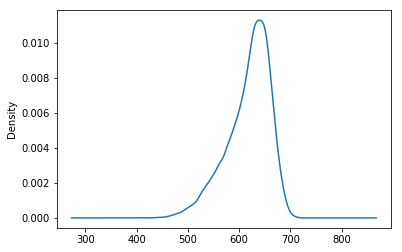

In [23]:
train_data["score"].plot(kind="density")

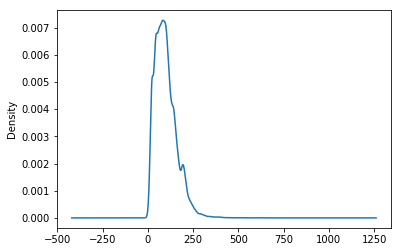

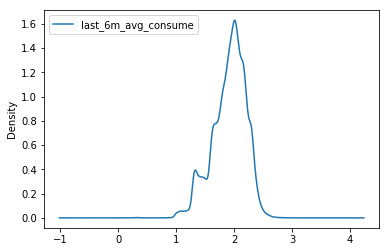

In [40]:
train_data["last_6m_avg_consume"].plot(kind="density")
pd.DataFrame(np.log10(train_data["last_6m_avg_consume"]+2)).plot(kind='density')


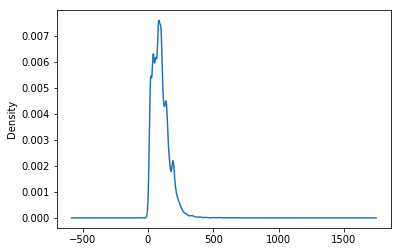

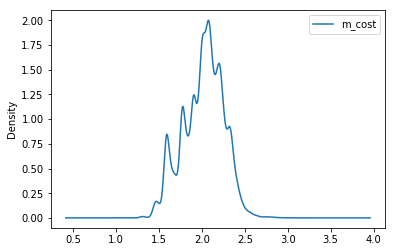

In [17]:
train_data["m_cost"].plot(kind="kde")
pd.DataFrame(np.log10(train_data["m_cost"]+20)).plot(kind='kde')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B61CB55C0>,
      dtype=object)

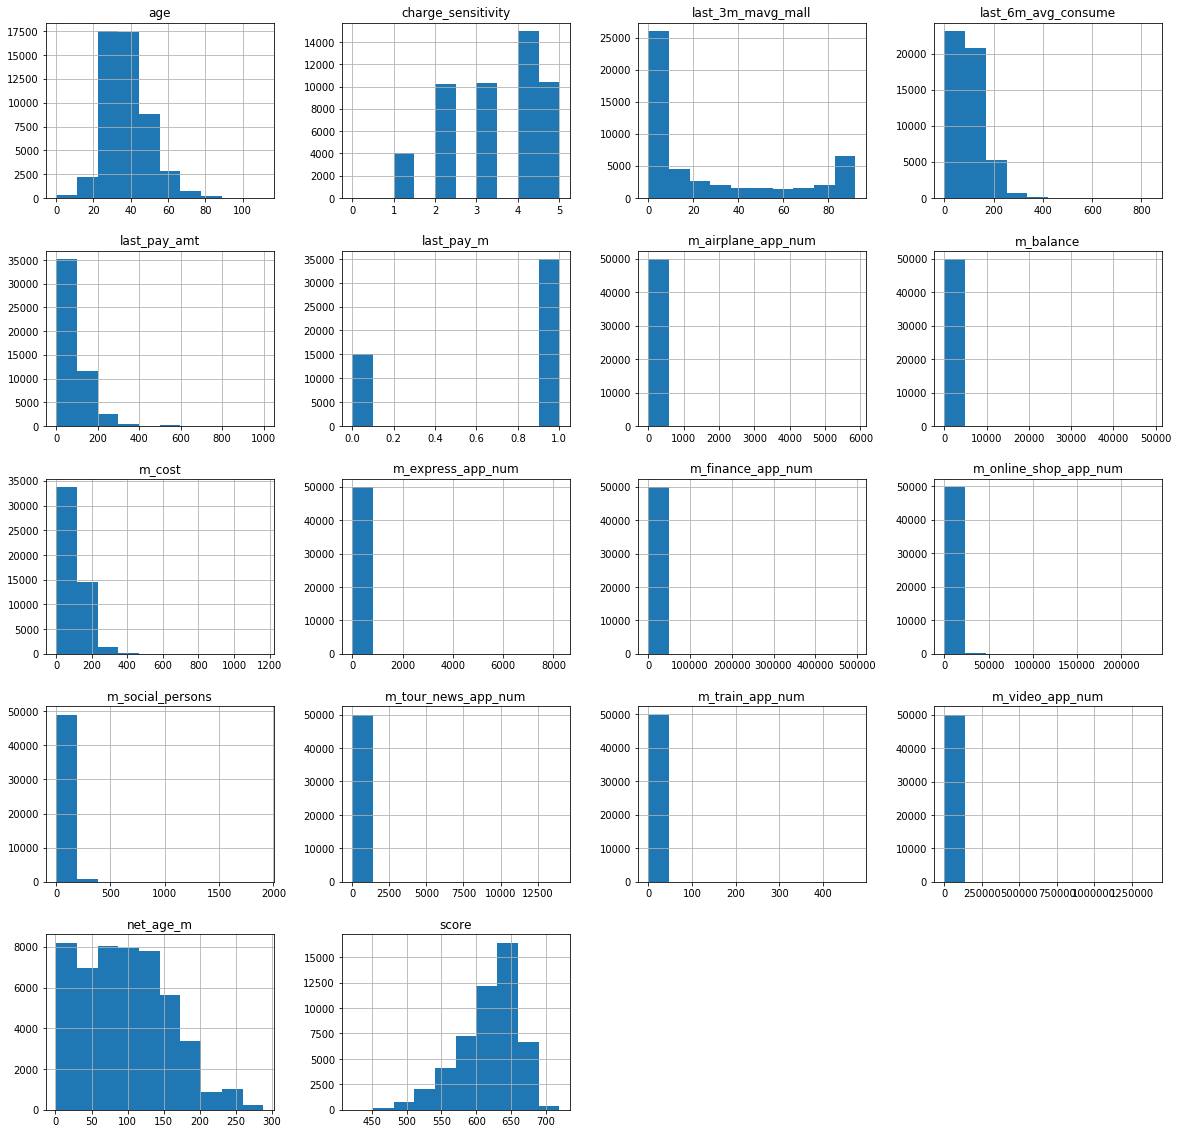

In [30]:
train_data[['age','net_age_m','last_pay_m','last_pay_amt','last_6m_avg_consume','m_cost','m_balance','charge_sensitivity','m_social_persons'
,'last_3m_mavg_mall','m_online_shop_app_num','m_express_app_num','m_finance_app_num','m_video_app_num','m_airplane_app_num'
,'m_train_app_num','m_tour_news_app_num','score']].hist(figsize=(20,20))

# 数值类属性通过盒形图观察数据分布情况

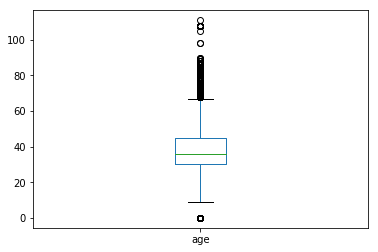

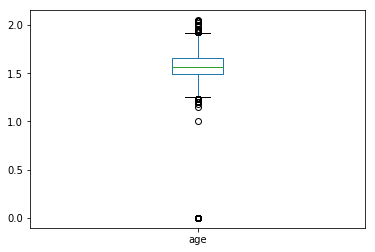

In [6]:
num_attribs = ['age', 'net_age_m', 'last_pay_m', 'last_pay_amt', 'last_6m_avg_consume', 'm_cost', 'm_balance'
            , 'charge_sensitivity', 'm_social_persons', 'last_3m_mavg_mall', 'm_online_shop_app_num', 'm_express_app_num'
            , 'm_finance_app_num', 'm_video_app_num', 'm_airplane_app_num', 'm_train_app_num', 'm_tour_news_app_num']
train_data["age"].plot(kind="box")
pd.DataFrame(np.log10(train_data["age"]+1)).plot(kind='box')

In [47]:
train_data["log_age"] = np.log10(train_data["age"]+1)
stats = train_data["log_age"].describe()
IQR = stats.loc["75%"] - stats.loc["25%"]
c_max = stats.loc["75%"] + 1.5 * IQR
c_min = stats.loc["25%"] - 1.5 * IQR
# train_data.loc[train_data["age"]==0]["age"]
# c_max
# train_data[(train_data["log_age"]<=c_max) & (train_data["log_age"]>=c_min)]#["log_age"]#.count()
# ((train_data["log_age"]>=c_max) | (train_data["log_age"]<=c_min)).where
# print(((train_data["log_age"]>=c_max) | (train_data["log_age"]<=c_min)).index.values.size)
train_data[(train_data["log_age"]>=c_max) | (train_data["log_age"]<=c_min)].index.values.size
# 48880
# 49571

429

In [24]:
train_data[["log_age", "age"]].describe().loc["75%"]

log_age     1.662758
age        45.000000
Name: 75%, dtype: float64

In [69]:
traind_data_corr = train_data.corr()
traind_data_corr["score"].sort_values(ascending=False)

score                    1.000000
net_age_m                0.546879
last_6m_avg_consume      0.493738
m_social_persons         0.477296
m_cost                   0.443053
last_pay_amt             0.333528
is_m_tour                0.270853
is_m_pay_gym             0.233045
last_pay_m               0.215241
last_3m_mavg_mall        0.197801
is_m_movies              0.165391
m_finance_app_num        0.113797
is_offen_mall            0.113087
is_blacklist             0.110556
is_arrears               0.089809
m_balance                0.081092
m_video_app_num          0.064858
is_m_Sam                 0.054115
is_m_WanDa               0.051379
age                      0.037770
m_online_shop_app_num    0.033498
m_train_app_num          0.032556
is_real_name             0.028925
is_undegraduate          0.025314
m_tour_news_app_num      0.020779
m_airplane_app_num       0.014363
m_express_app_num        0.001055
is_4G_ill               -0.147157
charge_sensitivity      -0.239397
Name: score, d

In [24]:
tmp_train_data = train_data.copy()
tmp_train_data["net_age_per_age"] = tmp_train_data["net_age_m"]/(12*tmp_train_data["age"])
tmp_train_data["last_6m_consum_per_net_age"] = tmp_train_data["last_6m_avg_consume"]/tmp_train_data["net_age_m"]
tmp_train_data["net_age_m_log"] = np.log10(train_data["net_age_m"]+1)
tmp_train_data["m_social_persons_log"] = np.log10(train_data["m_social_persons"]+1)
tmp_train_data["m_cost_log"] = np.log10(train_data["m_cost"]+1)
tmp_train_data["last_6m_avg_consume_log"] = np.log10(train_data["last_6m_avg_consume"]+1)
tmp_train_data_corr = tmp_train_data.corr()
tmp_train_data_corr["score"].sort_values(ascending=False)

score                         1.000000
m_social_persons_log          0.714305
net_age_m_log                 0.603995
net_age_per_age               0.557952
last_6m_avg_consume_log       0.553747
net_age_m                     0.546893
m_cost_log                    0.507172
last_6m_avg_consume           0.493749
m_social_persons              0.477302
m_cost                        0.443064
last_pay_amt                  0.333539
is_m_tour                     0.270870
is_m_pay_gym                  0.233067
last_pay_m                    0.215252
last_3m_mavg_mall             0.197827
is_m_movies                   0.165377
m_finance_app_num             0.113808
is_offen_mall                 0.113114
is_blacklist                  0.110549
is_arrears                    0.089803
m_balance                     0.081096
m_video_app_num               0.064864
is_m_Sam                      0.054110
is_m_WanDa                    0.051375
age                           0.037780
m_online_shop_app_num    

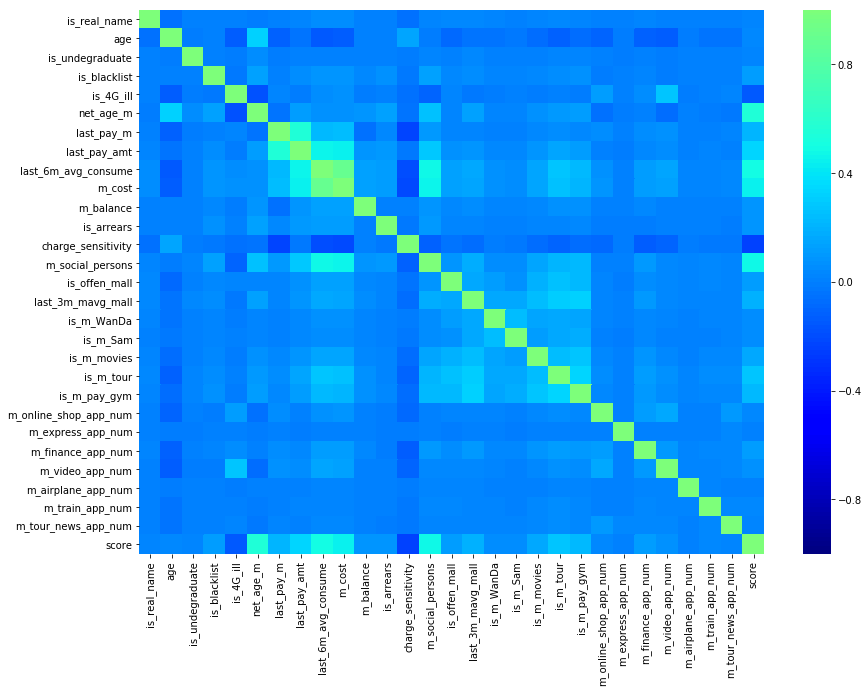

In [68]:
# traind_data_corr
%matplotlib inline 
import seaborn as sns
fig = plt.figure(figsize=(14,10))
# f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(traind_data_corr, center=1,cmap=plt.get_cmap("jet"), vmin=-1, vmax=1)

## 工具函数

In [26]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [27]:
cat_encoder = CategoricalEncoder()
train_data_cat_reshaped = train_data['charge_sensitivity'].values.reshape(-1, 1)
train_data_cat_1hot = cat_encoder.fit_transform(train_data_cat_reshaped)
print(train_data_cat_1hot.shape)
train_data_cat_1hot.data

(50000, 6)


array([1., 1., 1., ..., 1., 1., 1.])

## 构建pipeline

In [28]:
# DataFrameSelector
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.__attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.__attribute_names]
        
        

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, df_data):
        data_columns = df_data.columns
        self.ix_net_age_m = data_columns.get_loc("net_age_m")
        self.ix_age = data_columns.get_loc("age")
        self.ix_last_6m_avg_consume = data_columns.get_loc("last_6m_avg_consume")
        self.ix_m_social_persons = data_columns.get_loc("m_social_persons")
        self.ix_m_cost = data_columns.get_loc("m_cost")
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        print(self.ix_net_age_m)
#         m_net_age_per_age = X[:, self.ix_net_age_m] / (12*X[:, self.ix_age])
        last_6m_consum_per_net_age = X[:, self.ix_last_6m_avg_consume] / X[:, self.ix_net_age_m]
        print(X[:, self.ix_net_age_m]+1)
        net_age_m_log = np.log10(np.asarray((X[:, self.ix_net_age_m]+1), dtype=float))
        m_social_persons_log = np.log10(np.asarray(X[:, self.ix_m_social_persons]+1, dtype=float))
        m_cost_log = np.log10(np.asarray(X[:, self.ix_m_cost]+1, dtype=float))
        last_6m_avg_consume_log = np.log10(np.asarray(X[:, self.ix_last_6m_avg_consume]+1, dtype=float))
        return np.c_[X, last_6m_consum_per_net_age, net_age_m_log
                     , m_social_persons_log, m_cost_log, last_6m_avg_consume_log]
        

In [94]:
combine = CombinedAttributesAdder(train_data)
tmp = combine.transform(train_data.values)
tmp

6
[187 6 146 ... 154 147 108]


array([['a4651f98c82948b186bdcdc8108381b4', 1, 44, ...,
        1.9242792860618816, 2.204662511748219, 2.217115295507684],
       ['aeb10247db4e4d67b2550bbc42ff9827', 1, 18, ...,
        1.3424226808222062, 2.1646502159342966, 2.1883096301940044],
       ['5af23a1e0e77410abb25e9a7eee510aa', 1, 47, ...,
        1.7781512503836436, 2.0835026198302673, 2.0439121671012543],
       ...,
       ['7a51b581cf954969b0bafb47e06a4344', 1, 50, ...,
        1.6720978579357175, 2.1886191672078485, 2.1873232693750473],
       ['80c352e4c5a849c3afb3515cf4e25122', 1, 33, ...,
        1.3222192947339193, 1.5185139398778875, 1.5663196215248114],
       ['78a1527e9ca94519a5de3c2f82b745f0', 1, 32, ...,
        2.037426497940624, 2.1501421618485588, 2.252173155771534]],
      dtype=object)

In [95]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

num_attribs = ['age','net_age_m','last_pay_m','last_pay_amt','last_6m_avg_consume','m_cost','m_balance','charge_sensitivity','m_social_persons'
,'last_3m_mavg_mall','m_online_shop_app_num','m_express_app_num','m_finance_app_num','m_video_app_num','m_airplane_app_num'
,'m_train_app_num','m_tour_news_app_num']
binary_attribs = ['is_real_name','is_undegraduate','is_blacklist','is_4G_ill','is_arrears'
    ,'is_offen_mall','is_m_WanDa','is_m_Sam','is_m_movies','is_m_tour','is_m_pay_gym']
cat_attribs = ['charge_sensitivity']


##### Pipeline
num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("std_scaler", StandardScaler()),
])

binary_pipeline = Pipeline([
    ("selector", DataFrameSelector(binary_attribs)),
])

cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
])

# extra_pipeline = Pipeline([
#     ("extra_feature", CombinedAttributesAdder(train_data)),
# ])

##########
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("binary_pipeline", binary_pipeline),
        ("cat_pipeline", cat_pipeline),
#         ("extra_pipeline", extra_pipeline),
    ])


In [96]:
# train_data
# tmp_train_data
train_data_prepared = full_pipeline.fit_transform(tmp_train_data)

# net_age_per_age = tmp_train_data["net_age_m"]/(12*tmp_train_data["age"])
last_6m_consum_per_net_age = tmp_train_data["last_6m_avg_consume"]/tmp_train_data["net_age_m"]
net_age_m_log = np.log10(train_data["net_age_m"]+1)
m_social_persons_log = np.log10(train_data["m_social_persons"]+1)
m_cost_log = np.log10(train_data["m_cost"]+1)
last_6m_avg_consume_log = np.log10(train_data["last_6m_avg_consume"]+1)
train_data_prepared = np.c_[train_data_prepared, last_6m_consum_per_net_age, net_age_m_log
                            , m_social_persons_log, m_cost_log, last_6m_avg_consume_log]

train_data_label = train_data["score"]

## 项目评估函数

In [97]:
from sklearn.metrics import mean_absolute_error
def result_score(y_true, y_pred):
    return 1/(1+mean_absolute_error(y_true, y_pred))

## 数据切分测试

In [98]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

rs = ShuffleSplit(n_splits=5, test_size=.01, random_state=142)
for train_idx, test_idx in rs.split(train_data_prepared):
    train_X = train_data_prepared[train_idx]
    train_y = train_data_label[train_idx]
    test_X = train_data_prepared[test_idx]
    test_y = train_data_label[test_idx]

    lin_reg = LinearRegression()
    lin_reg.fit(train_X, train_y)
    print("=====================")
    print("train score: ", result_score(train_y, lin_reg.predict(train_X)))
    print("test score: ", result_score(test_y, lin_reg.predict(test_X)))
#     print(lin_reg.predict(test_data_prepared[0].reshape(1, 34)))
# lin_reg.fit(train_data_prepared, train_data_label)

train score:  0.05798218406721243
test score:  0.05536707740237432
train score:  0.0579660756085213
test score:  0.0571070166492499
train score:  0.057932423116706426
test score:  0.059685102827658064
train score:  0.05797043589694393
test score:  0.05723162039171333
train score:  0.05797294657913375
test score:  0.05661011961362965


## 线性模型测试集预测

In [105]:
def test_predict(model, pipeline, file_name):
    test_data = load_data(TEST_DATA, is_train=0)
    test_data_prepared = pipeline.fit_transform(test_data)
    
    last_6m_consum_per_net_age = test_data["last_6m_avg_consume"]/test_data["net_age_m"]
    net_age_m_log = np.log10(test_data["net_age_m"]+1)
    m_social_persons_log = np.log10(test_data["m_social_persons"]+1)
    m_cost_log = np.log10(test_data["m_cost"]+1)
    last_6m_avg_consume_log = np.log10(test_data["last_6m_avg_consume"]+1)
    test_data_prepared = np.c_[test_data_prepared, last_6m_consum_per_net_age, net_age_m_log
                            , m_social_persons_log, m_cost_log, last_6m_avg_consume_log]
    
    test_pred = model.predict(test_data_prepared)
    df_result = pd.DataFrame(np.c_[test_data["id"], test_pred.round()], columns=["id", "score"])
    print(df_result.head())
    if not os.path.exists(OUTPUT_PATH):
        os.makedirs(OUTPUT_PATH)
    file = os.path.join(OUTPUT_PATH, file_name)
    df_result.to_csv(file, index=False, sep=",", encoding="utf-8")
    print("The predict result was written to ", file)
    

In [54]:
test_data = load_data(TEST_DATA, is_train=0)
test_data.describe()

,is_real_name,age,is_undegraduate,is_blacklist,is_4G_ill,net_age_m,last_pay_m,last_pay_amt,last_6m_avg_consume,m_cost,...,is_m_movies,is_m_tour,is_m_pay_gym,m_online_shop_app_num,m_express_app_num,m_finance_app_num,m_video_app_num,m_airplane_app_num,m_train_app_num,m_tour_news_app_num
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000
mean,0.992260,37.932380,0.003520,0.048200,0.088800,96.094480,0.702740,54.027936,99.234402,99.842912,...,0.245320,0.476500,0.375340,1173.46996,0.853880,979.229100,3406.12244,0.595100,0.57584,19.672180
std,0.087637,11.636829,0.059226,0.214191,0.284458,59.048962,0.457057,62.614124,61.245686,65.301379,...,0.430281,0.499452,0.484215,4586.71334,28.848873,2924.008879,9919.40536,13.025441,8.20404,408.041808
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
25%,1.000000,30.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.450000,53.200000,...,0.000000,0.000000,0.000000,17.00000,0.000000,5.000000,10.00000,0.000000,0.00000,0.000000
50%,1.000000,36.000000,0.000000,0.000000,0.000000,94.000000,1.000000,49.900000,90.000000,90.000000,...,0.000000,0.000000,0.000000,246.00000,0.000000,263.000000,333.00000,0.000000,0.00000,0.000000
75%,1.000000,45.000000,0.000000,0.000000,0.000000,139.000000,1.000000,99.800000,132.000000,135.235000,...,0.000000,1.000000,1.000000,935.00000,0.000000,1144.000000,2455.00000,0.000000,0.00000,4.000000
max,1.000000,108.000000,1.000000,1.000000,1.000000,288.000000,1.000000,1000.000000,1792.740000,2117.010000,...,1.000000,1.000000,1.000000,417536.00000,5462.000000,329767.000000,295210.00000,1645.000000,775.00000,87681.000000


In [106]:
# lin_reg.fit(train_data_prepared[:], train_data_label[:])
test_predict(lin_reg, full_pipeline, "lin_reg_base_line-v1.csv")

                                 id score
0  7171737d49b143d1b38883a39e4a5730   593
1  3af0a449d5424488912e8fb2bf4b9faa   563
2  eb2cf02e0d5c4d1294dd73e776dbb441   675
3  9c0f780ecb254670a11aa9e3f10777c5   664
4  d794eed46c1e44f785a575f18b3023a5   660
The predict result was written to  F:\Git\data\userprofile\result\lin_reg_base_line-v1.csv


## RandomForestRegressor

In [101]:
# 交叉验证函数
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
def cross_val(model):
    rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=142)
    for train_idx, test_idx in rs.split(train_data_prepared):
        train_X = train_data_prepared[train_idx]
        train_y = train_data_label[train_idx]
        test_X = train_data_prepared[test_idx]
        test_y = train_data_label[test_idx]
    
        model.fit(train_X, train_y)
        print("=====================")
        print("train score: ", result_score(train_y, model.predict(train_X)))
        print("test score: ", result_score(test_y, model.predict(test_X)))
#         print(model.predict(test_data_prepared[0].reshape(1, 34)))
# lin_reg.fit(train_data_prepared, train_data_label)

In [102]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10, max_depth=5, criterion="mae", max_features="sqrt")
cross_val(forest_reg)


train score:  0.055189185215567864
test score:  0.05518606644534846
train score:  0.05460063493986359
test score:  0.0546705367575167
train score:  0.05427483822841717
test score:  0.05355909850182348


KeyboardInterrupt: 

In [234]:
feature_importances = forest_reg.feature_importances_
cat_one_hot_attribs = ["sensitivity_0", "sensitivity_1", "sensitivity_2", "sensitivity_3", "sensitivity_4", "sensitivity_5"]
attributes = num_attribs + binary_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes), reverse=True)

[(0.23693658907805087, 'm_social_persons'),
 (0.22095921361523554, 'net_age_m'),
 (0.16788605991316957, 'last_6m_avg_consume'),
 (0.10388925564095801, 'm_cost'),
 (0.046041753690729784, 'last_pay_amt'),
 (0.04218903730282465, 'm_online_shop_app_num'),
 (0.041821606888206464, 'sensitivity_5'),
 (0.024992386674860458, 'm_video_app_num'),
 (0.021291865214290072, 'charge_sensitivity'),
 (0.021087565282657966, 'age'),
 (0.017157385528831785, 'is_m_pay_gym'),
 (0.01135232596413031, 'm_balance'),
 (0.010945174364198175, 'last_pay_m'),
 (0.008868054503942346, 'm_finance_app_num'),
 (0.007535641886377453, 'is_m_tour'),
 (0.005212407782099279, 'is_4G_ill'),
 (0.004935192445695985, 'last_3m_mavg_mall'),
 (0.0018478368096928731, 'is_arrears'),
 (0.0017372679958241586, 'm_tour_news_app_num'),
 (0.001568286342232617, 'is_m_movies'),
 (0.000642534850473796, 'is_blacklist'),
 (0.0005052293718383359, 'sensitivity_3'),
 (0.0002471720377775958, 'is_offen_mall'),
 (0.00021309050995974022, 'm_train_app_num

In [235]:
traind_data_corr["score"].sort_values(ascending=False)

score                    1.000000
net_age_m                0.546879
last_6m_avg_consume      0.493738
m_social_persons         0.477296
m_cost                   0.443053
last_pay_amt             0.333528
is_m_tour                0.270853
is_m_pay_gym             0.233045
last_pay_m               0.215241
last_3m_mavg_mall        0.197801
is_m_movies              0.165391
m_finance_app_num        0.113797
is_offen_mall            0.113087
is_blacklist             0.110556
is_arrears               0.089809
m_balance                0.081092
m_video_app_num          0.064858
is_m_Sam                 0.054115
is_m_WanDa               0.051379
age                      0.037770
m_online_shop_app_num    0.033498
m_train_app_num          0.032556
is_real_name             0.028925
is_undegraduate          0.025314
m_tour_news_app_num      0.020779
m_airplane_app_num       0.014363
m_express_app_num        0.001055
is_4G_ill               -0.147157
charge_sensitivity      -0.239397
Name: score, d